# Import

In [35]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


from torchvision.transforms import functional as F
import PIL



In [36]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

READ DATA

In [37]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk("C:/Users/sarab/Desktop/DS_EXAMENARBETE/Brain_tumor/yes"):
    
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
        
        

In [38]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk("C:/Users/sarab/Desktop/DS_EXAMENARBETE/Brain_tumor/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))

        result.append(encoder.transform([[1]]).toarray())

In [39]:
BUILD MODEL

SyntaxError: invalid syntax (2329172394.py, line 1)

In [40]:
data = np.array(data)
data.shape



(139, 128, 128, 3)

In [41]:
result = np.array(result)
result = result.reshape(139,2)

In [42]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2,shuffle=True, random_state=42)


In [43]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
#model.add(Dense(2, activation='softmax'))
#model.compile(loss = "categorical_crossentropy", optimizer='Adam')

model.add(Dense(2, activation='sigmoid'))

# Compile the model with accuracy as a metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 128, 128, 32)      416       
                                                                 
 conv2d_13 (Conv2D)          (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization_6 (Bat  (None, 128, 128, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 64, 64, 64)       

In [44]:
x_train.shape

(111, 128, 128, 3)

In [45]:
y_train.shape

(111, 2)

In [49]:
history = model.fit(x_train, y_train, epochs = 20, batch_size = 16, verbose = 1,validation_data = (x_test, y_test))


Epoch 1/20
7/7 [==============================] - 3s 405ms/step - loss: 0.0120 - accuracy: 0.9910 - val_loss: 2.1573 - val_accuracy: 0.8571
Epoch 2/20
7/7 [==============================] - 3s 385ms/step - loss: 0.0731 - accuracy: 0.9910 - val_loss: 2.4776 - val_accuracy: 0.7857
Epoch 3/20
7/7 [==============================] - 3s 391ms/step - loss: 2.5336e-05 - accuracy: 1.0000 - val_loss: 4.2943 - val_accuracy: 0.6429
Epoch 4/20
7/7 [==============================] - 3s 402ms/step - loss: 1.5430e-04 - accuracy: 1.0000 - val_loss: 5.2583 - val_accuracy: 0.6429
Epoch 5/20
7/7 [==============================] - 3s 404ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 4.6219 - val_accuracy: 0.6429
Epoch 6/20
7/7 [==============================] - 3s 397ms/step - loss: 0.0655 - accuracy: 0.9910 - val_loss: 7.4243 - val_accuracy: 0.5714
Epoch 7/20
7/7 [==============================] - 3s 393ms/step - loss: 0.0507 - accuracy: 0.9910 - val_loss: 3.6416 - val_accuracy: 0.6786
Epoch 8/20
7

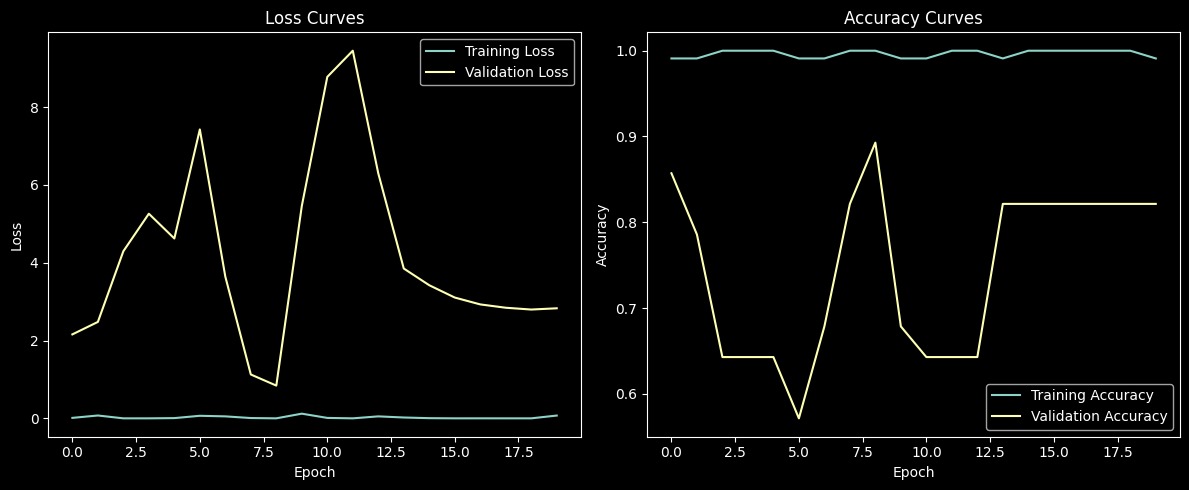

1/1 [==============================] - 0s 157ms/step - loss: 2.8279 - accuracy: 0.8214
Test Loss: 2.827871799468994
Test Accuracy: 0.8214285969734192
1/1 [==============================] - 0s 148ms/step
Precision: 0.7857142857142857
Recall: 0.8461538461538461
F-score: 0.8148148148148148
Accuracy: 0.8214285714285714


In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming you have defined 'history', 'x_test', 'y_test', and 'model' before this code snippet

# Extracting metrics from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotting loss and accuracy curves together
plt.figure(figsize=(12, 5))

# Loss curves
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy curves
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Predict probabilities for the test set
y_pred_probabilities = model.predict(x_test)

# Convert probabilities to class predictions
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Convert test labels to integer format (assuming they are one-hot encoded)
y_test_integer = np.argmax(y_test, axis=1)

# Compute precision, recall, F-score, and accuracy
precision = precision_score(y_test_integer, y_pred)
recall = recall_score(y_test_integer, y_pred)
f_score = f1_score(y_test_integer, y_pred)
accuracy = accuracy_score(y_test_integer, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F-score:', f_score)
print('Accuracy:', accuracy)


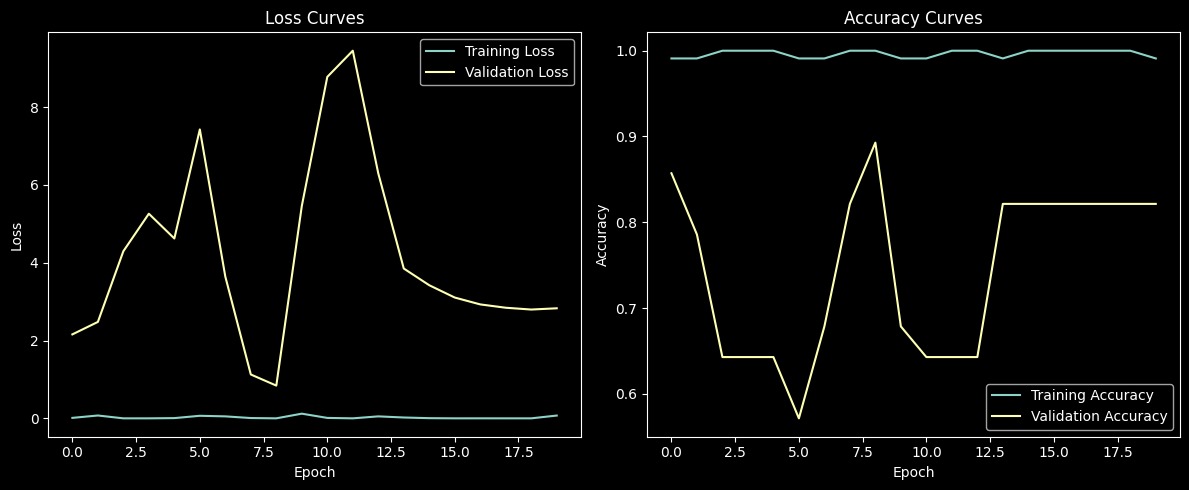

1/1 [==============================] - 0s 141ms/step - loss: 2.8279 - accuracy: 0.8214
Test Loss: 2.827871799468994
Test Accuracy: 0.8214285969734192
1/1 [==============================] - 0s 125ms/step
Precision: 0.8239795918367346
Recall: 0.8214285714285714
F-score: 0.8216566320014597
Accuracy: 0.8214285714285714


In [51]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming you have defined 'history', 'x_test', 'y_test', and 'model' before this code snippet

# Extracting metrics from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotting loss and accuracy curves together
plt.figure(figsize=(12, 5))

# Loss curves
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy curves
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Predict probabilities for the test set
y_pred_probabilities = model.predict(x_test)

# Convert probabilities to class predictions
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Convert test labels to integer format (assuming they are one-hot encoded)
y_test_integer = np.argmax(y_test, axis=1)

# Compute precision, recall, F-score, and accuracy
precision = precision_score(y_test_integer, y_pred, average='weighted')
recall = recall_score(y_test_integer, y_pred, average='weighted')
f_score = f1_score(y_test_integer, y_pred, average='weighted')
accuracy = accuracy_score(y_test_integer, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F-score:', f_score)
print('Accuracy:', accuracy)


#### What kind of images does the dataset consist of?

   Here to check if the images are RGB, grayscale, or with a transparency alpha channel.
   Assuming all the images in the dataset are the same, so we only need to check one sample image.
   

The torchvision.transforms.functional module has been imported as F.
The sample image to check has been loaded as image.

Recall that RGB image has three channels
Grayscale image - has one channel.
Alpha image - has four channels.


In [ ]:
from PIL import Image

# Open the image
image = Image.open("C:/Users/sarab/Desktop/DS_EXAMENARBETE/Brain_tumor/yes/Y4.jpg")

# Get the number of channels
num_channels = image.getbands()

# Print the result
print("Number of channels:", len(num_channels))
print("Channels:", num_channels)


In [ ]:
import os
from PIL import Image

# Directory containing the images
directory = "C:/Users/sarab/Desktop/DS_EXAMENARBETE/Brain_tumor/yes/"

# Iterate over each image file in the directory
for filename in os.listdir(directory):
    # Check if the file is an image (you may want to add more image file extensions if needed)
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # Form the complete path to the image file
        filepath = os.path.join(directory, filename)
        
        # Open the image
        image = Image.open(filepath)
        
        # Get the mode (type) of channels
        channel_type = image.mode
        
        # Print the result
        print(f"Image: {filename} | Channel type: {channel_type}")



NO --the number of images with different channel configurations:

Images with 1 channel: 13
Images with 3 channels: 58
Images with 4 channels: 6
 
 yes -- 
 Images with 1 channel: 22
Images with 3 channels: 74
Images with 4 channels: 0


Images with 3 channels (RGB): 68
Images with 1 channel (grayscale): 18

In [ ]:
from PIL import Image

def check_image_properties(image_path):
    # Open the image
    image = Image.open(image_path)

    # Get image dimensions
    width, height = image.size
    print("Image dimensions (width x height):", width, "x", height)

    # Get number of color channels
    num_channels = len(image.getbands())
    print("Number of color channels:", num_channels)

    # Get image mode (color space)
    image_mode = image.mode
    print("Image mode (color space):", image_mode)

    # Get image bit depth
    image_bit_depth = image.bits
    print("Image bit depth:", image_bit_depth)

    # Print metadata (example: Exif data)
    exif_data = image.info.get("exif")
    if exif_data:
        print("Exif data:", exif_data)
    else:
        print("No Exif data found.")

    # Close the image
    image.close()

# Example usage
image_path = "C:/Users/sarab/Desktop/DS_EXAMENARBETE/Brain_tumor/yes/Y20.jpg"
check_image_properties(image_path)


In [ ]:
import os

# Specify the directory containing dataset
dataset_dir = "C:/Users/sarab/Desktop/DS_EXAMENARBETE/Brain_tumor/"

# Count the number of images in each class
positive_class_count = len(os.listdir(os.path.join(dataset_dir, "yes")))
negative_class_count = len(os.listdir(os.path.join(dataset_dir, "no")))

# Print the class counts
print("Number of images with tumors (positive class):", positive_class_count)
print("Number of images without tumors (negative class):", negative_class_count)

# Check for class imbalance
if positive_class_count != negative_class_count:
    print("Warning: Class imbalance detected. Consider balancing the dataset.")
else:
    print("Dataset is balanced.")


In [ ]:
EDA Images

In [ ]:
from PIL import Image

for path in paths:
    img = Image.open(path)
    width, height = img.size
    print("Width:", width)
    print("Height:", height)


In [ ]:
from PIL import Image

# Define a list of image dimensions
image_dimensions = [
    (180, 218), (319, 360), (300, 336), (587, 630), (825, 993),
    (700, 890), (205, 246), (200, 253), (512, 512), (1059, 1200),
    (400, 369), (377, 500), (254, 325), (289, 300), (310, 380),
    (400, 431), (263, 300), (467, 586), (318, 380), (355, 450),
    (206, 244), (766, 879), (256, 256), (209, 212), (240, 300),
    (204, 247), (294, 380), (1024, 1024), (213, 237), (504, 630),
    (197, 256), (201, 251), (781, 960), (628, 630), (630, 630),
    (456, 519), (250, 294), (526, 555), (450, 446), (236, 278),
    (225, 225), (1275, 1427), (200, 210), (634, 929), (911, 938),
    (230, 219), (620, 620), (433, 520), (374, 456), (353, 442),
    (216, 234), (226, 223), (1061, 1280), (194, 260), (864, 938)
]

# Define a dictionary to store counts for each unique dimension group
dimension_counts = {}

# Iterate over each image dimension
for width, height in image_dimensions:
    # Create a unique identifier for the dimension group
    dimension_group = (width, height)
    
    # If the dimension group is already in the dictionary, increment its count
    if dimension_group in dimension_counts:
        dimension_counts[dimension_group] += 1
    # If the dimension group is not in the dictionary, initialize its count to 1
    else:
        dimension_counts[dimension_group] = 1

# Print the counts for each unique dimension group
for dimension_group, count in dimension_counts.items():
    print(f"Dimensions: {dimension_group} | Count: {count}")

# Print the total number of groups
print("Total number of groups:", len(dimension_counts))


In [ ]:
import numpy as np
from PIL import Image

# Initialize lists to store preprocessed images and results
data = []
result = []

# Loop through image paths
for path in paths:
    img = Image.open(path)
    img = img.resize((128, 128))
    img = np.array(img)
    
    # Check if the image shape is compatible (either 3 channels or 4 channels)
    if img.shape == (128, 128, 3) or img.shape == (128, 128, 4):
        # Append the preprocessed image to the data list
        data.append(np.array(img))
        
        # Append the result (assuming you have an encoder defined)
        result.append(encoder.transform([[1]]).toarray())


In [ ]:
# Update result list for images without tumor
paths = []
for r, d, f in os.walk("C:/Users/sarab/Desktop/DS_EXAMENARBETE/Brain_tumor/no"):
    for file in f:
        if file.endswith('.jpg') or file.endswith('.png'):
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128, 128))
    img = np.array(img)
    if img.shape == (128, 128, 3) or img.shape == (128, 128, 4):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())


In [ ]:
# Update result list for images without tumor
paths = []
for r, d, f in os.walk("C:/Users/sarab/Desktop/DS_EXAMENARBETE/Brain_tumor/yes"):
    for file in f:
        if file.endswith('.jpg') or file.endswith('.png'):
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128, 128))
    img = np.array(img)
    if img.shape == (128, 128, 3) or img.shape == (128, 128, 4):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())


In [ ]:
import numpy as np
from PIL import Image
import glob

# Function to preprocess a single image
def preprocess_image(image_path, target_shape=(128, 128, 4)):
    # Open the image
    image = Image.open(image_path)
    
    # Convert image to RGBA format (if not already)
    image = image.convert("RGBA")
    
    # Resize image to target shape
    image = image.resize((target_shape[0], target_shape[1]))
    
    # Convert image to numpy array
    image_array = np.array(image)
    
    # If image has only 1 channel, replicate it across 3 channels
    if image_array.shape[2] == 1:
        image_array = np.repeat(image_array, 3, axis=2)
    
    # If image has 3 channels, convert to 4 channels (RGBA) by adding an alpha channel
    if image_array.shape[2] == 3:
        alpha_channel = np.full((target_shape[0], target_shape[1], 1), 255, dtype=np.uint8)
        image_array = np.concatenate([image_array, alpha_channel], axis=2)
    
    # Normalize pixel values to range [0, 1]
    image_array = image_array / 255.0
    
    return image_array

# Directory containing the images
image_directory = "C:/Users/sarab/Desktop/DS_EXAMENARBETE/Brain_tumor/"

# Get a list of all PNG files in the directory
image_files = glob.glob(image_directory + "*.png")

# Preprocess each image
for image_path in image_files:
    preprocessed_image = preprocess_image(image_path)
    print("Preprocessed image shape:", preprocessed_image.shape)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),  # Dropout layer for regularization
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),  # Dropout layer for regularization
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),  # Dropout layer for regularization
    layers.Dense(2, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Change to 'categorical_crossentropy' if needed
              metrics=['accuracy'])

# Define callbacks
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss', patience=10, verbose=1, restore_best_weights=True
)

checkpoint = callbacks.ModelCheckpoint(
    "best_model.h5", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1
)

# Data Augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
val_generator = val_datagen.flow(x_val, y_val, batch_size=32)

# Train the model with early stopping and data augmentation
history = model.fit(train_generator,
                    epochs=100,
                    validation_data=val_generator,
                    callbacks=[early_stopping, checkpoint])

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


In [ ]:
import matplotlib.pyplot as plt

# Retrieve training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout after the first dense layer
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Dropout after the second dense layer
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),  # Dropout after the third dense layer
    layers.Dense(2, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Data augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# No augmentation for validation and test data
val_test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Load and augment the training data
train_generator = train_datagen.flow(x_train, y_train, batch_size=32)

# Load validation and test data
val_data = val_test_datagen.flow(x_val, y_val)
test_data = val_test_datagen.flow(x_test, y_test)

# Train the model with early stopping and data augmentation
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, verbose=1, restore_best_weights=True
)

history = model.fit(train_generator, epochs=30, 
                    validation_data=val_data, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_data)
print('Test accuracy:', test_acc)


In [ ]:
import matplotlib.pyplot as plt

# Retrieve training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Assuming you have trained your model and made predictions
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Convert predicted probabilities to class labels
y_pred_train_classes = (y_pred_train > 0.5).astype(int)
y_pred_test_classes = (y_pred_test > 0.5).astype(int)

# Print classification report for training set
print("Training Set Classification Report:")
print(classification_report(y_train, y_pred_train_classes))

# Print classification report for test set
print("Test Set Classification Report:")
print(classification_report(y_test, y_pred_test_classes))


In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Train the model
#history = model.fit(x_train, y_train, epochs=30, batch_size=batch_Size, verbose=1, validation_data=(x_test, y_test))

# Get training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get model predictions on training and validation sets
y_train_pred = model.predict(x_train)
y_val_pred = model.predict(x_test)

# Calculate RMSE for training and validation sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse = np.sqrt(mean_squared_error(y_test, y_val_pred))

# Print the results
print(f'Training Loss: {train_loss[-1]:.4f}')
print(f'Validation Loss: {val_loss[-1]:.4f}')
print(f'Training RMSE: {train_rmse:.4f}')
print(f'Validation RMSE: {val_rmse:.4f}')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Define the training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get model predictions on training and validation sets
y_train_pred = model.predict(x_train)
y_val_pred = model.predict(x_test)

# Calculate RMSE for training and validation sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse = np.sqrt(mean_squared_error(y_test, y_val_pred))

# Plot the training and validation loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Print the RMSE values
print(f'Training RMSE: {train_rmse:.4f}')
print(f'Validation RMSE: {val_rmse:.4f}')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Identify overfitting
min_val_loss = min(val_loss)
overfitting_epoch = val_loss.index(min_val_loss) + 1

print(f'Minimum Validation Loss: {min_val_loss:.4f}')
print(f'Epoch with Minimum Validation Loss: {overfitting_epoch}')


In [ ]:
class MyGaussianNoise(keras.layers.Layer):
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev
    def call(self, X, training=None):
        if training:
        noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
        return X + noise
    else:
        return X
     def compute_output_shape(self, batch_input_shape):
        return batch_input_shape


##result droput 0.5 , 0.5 , 0.5 
Training Loss: 0.0219
Validation Loss: 1.1769
Training RMSE: 0.2232
Validation RMSE: 0.4511
- accuracy: 1.0000
- val_accuracy: 0.7143


## result dropout 0.2, 0.2 ,0.2
Training Loss: 0.0161
Validation Loss: 7.0876
Training RMSE: 0.2095
Validation RMSE: 0.5865
- accuracy: 1.0000 
- val_accuracy: 0.6429


##### Result with dropout 0.5, 0.2 , 0.1 batch = 64, epoch = 50 
-Training Loss: 0.0002

-Validation Loss: 3.7212

-Training RMSE: 0.2645

-Validation RMSE: 0.4019

---------------------------------------------------------------------
##### Result with dropout 0.2, 0.1 , 0.1 batch = 64, epoch = 50 
-Training Loss: 0.0000

-Validation Loss: 2.3191

-Training RMSE: 0.0017

-Validation RMSE: 0.5174

-----------------------------------------------------------------------


##### Result with dropout 0.2, 0.1 , 0.1 batch = 64, epoch = 30 

Training Loss: 0.0000 

Validation Loss: 2.3645

Training RMSE: 0.0009

Validation RMSE: 0.5457


##### Result with dropout 0.3, 0.1 , 0.1 batch = 32, epoch = 30 


- loss: 0.0097

- accuracy: 0.9910 

- val_accuracy: 0.8214

Training Loss: 0.0097

Validation Loss: 1.5764

Training RMSE: 0.0823

Validation RMSE: 0.3672


#### Analysis of Dropout Experiments in Deep Learning
In the pursuit of training robust and well-generalizing neural networks, various hyperparameters and techniques, such as dropout, are explored. Here, we delve into the results of several dropout experiments, each with distinct dropout rates, batch sizes, and epochs.

Experiment 1: Dropout Rates (0.5, 0.2, 0.1), Batch Size = 64, Epochs = 50
Training Loss: 0.0002
Validation Loss: 3.7212
Training RMSE: 0.2645
Validation RMSE: 0.4019
Observations:

The low training loss suggests a good fit to the training data.
However, the significant disparity between training and validation losses, along with the validation RMSE, indicates potential overfitting.
Experiment 2: Dropout Rates (0.2, 0.1, 0.1), Batch Size = 64, Epochs = 50
Training Loss: 0.0000
Validation Loss: 2.3191
Training RMSE: 0.0017
Validation RMSE: 0.5174
Observations:

Achieving a remarkably low training loss and RMSE.
The validation loss and RMSE are higher than the first experiment, implying ongoing overfitting concerns.
Experiment 3: Dropout Rates (0.2, 0.1, 0.1), Batch Size = 64, Epochs = 30
Training Loss: 0.0000
Validation Loss: 2.3645
Training RMSE: 0.0009
Validation RMSE: 0.5457
Observations:

Similar performance to Experiment 2, but reducing epochs does not significantly impact validation metrics.
Experiment 4: Dropout Rates (0.3, 0.1, 0.1), Batch Size = 32, Epochs = 30
Training Loss: 0.0097
Validation Loss: 1.5764
Training RMSE: 0.0823
Validation RMSE: 0.3672
Observations:

Higher training loss, but an improvement in validation metrics, suggesting better generalization.
A smaller batch size contributes to a more robust model.
Overall Recommendations:
Experiment 4 with a dropout rate of 0.3, 0.1, 0.1, a batch size of 32, and 30 epochs strikes a balance between training performance and generalization.
Further hyperparameter tuning, such as learning rate adjustments, can be explored for potential improvements.
Consider experimenting with different model architectures or additional regularization techniques.
Evaluate the model on a diverse test set to ensure generalization across various datasets.





# PLot

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()




In [ ]:
####Save best model

In [ ]:
model.save('Best_pred_model.h5')


# Predection

In [ ]:
Predction Visual

In [52]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence This Is No, Its not a tumor


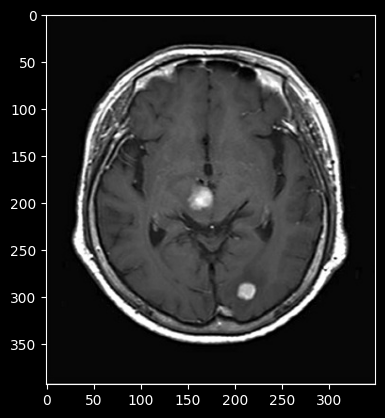

In [53]:
from matplotlib.pyplot import imshow
img = Image.open("C:/Users/sarab/Desktop/DS_EXAMENARBETE/Brain_tumor/no/N17.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

100.0% Confidence This Is A Its a Tumor


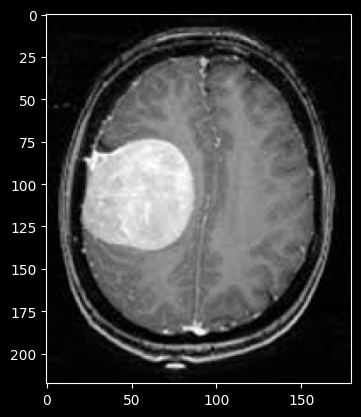

In [54]:
from matplotlib.pyplot import imshow
img = Image.open("C:/Users/sarab/Desktop/DS_EXAMENARBETE/Brain_tumor/yes/Y1.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

##Predection Analysis

In [55]:
# Get model predictions on the test set
y_pred_probabilities = model.predict(x_test)

# Convert predicted probabilities to binary predictions (0 or 1)
y_pred_binary = (y_pred_probabilities[:, 1] > 0.5).astype(int)

# Convert one-hot encoded labels to binary labels for y_test
y_test_binary = np.argmax(y_test, axis=1)

# Display original labels, predicted probabilities, and binary predictions for the first few examples
num_examples_to_display = 10
for i in range(num_examples_to_display):
    print(f"Example {i + 1}:")
    print(f"Original Label: {y_test_binary[i]}")
    print(f"Predicted Probability (Class 1): {y_pred_probabilities[i, 1]}")
    print(f"Binary Prediction: {y_pred_binary[i]}\n")


1/1 [==============================] - 0s 76ms/step
Example 1:
Original Label: 1
Predicted Probability (Class 1): 1.0
Binary Prediction: 1

Example 2:
Original Label: 0
Predicted Probability (Class 1): 0.0020658201538026333
Binary Prediction: 0

Example 3:
Original Label: 0
Predicted Probability (Class 1): 0.9999998211860657
Binary Prediction: 1

Example 4:
Original Label: 1
Predicted Probability (Class 1): 1.0
Binary Prediction: 1

Example 5:
Original Label: 0
Predicted Probability (Class 1): 1.0
Binary Prediction: 1

Example 6:
Original Label: 0
Predicted Probability (Class 1): 2.4246857689564014e-34
Binary Prediction: 0

Example 7:
Original Label: 0
Predicted Probability (Class 1): 0.00045989034697413445
Binary Prediction: 0

Example 8:
Original Label: 0
Predicted Probability (Class 1): 8.138242151289887e-07
Binary Prediction: 0

Example 9:
Original Label: 1
Predicted Probability (Class 1): 1.0
Binary Prediction: 1

Example 10:
Original Label: 0
Predicted Probability (Class 1): 1.01

In [56]:
# Get model predictions on the entire dataset
all_pred_probabilities = model.predict(data)

# Convert predicted probabilities to binary predictions (0 or 1)
all_pred_binary = (all_pred_probabilities[:, 1] > 0.5).astype(int)

# Convert one-hot encoded labels to binary labels for the entire dataset
all_test_binary = np.argmax(result, axis=1)

# Calculate the percentage of each category
percentage_tumor = (np.sum(all_test_binary == 0) / len(all_test_binary)) * 100
percentage_healthy = (np.sum(all_test_binary == 1) / len(all_test_binary)) * 100

print(f"Percentage of Tumor images: {percentage_tumor:.2f}%")
print(f"Percentage of Healthy images: {percentage_healthy:.2f}%")


5/5 [==============================] - 0s 87ms/step
Percentage of Tumor images: 50.36%
Percentage of Healthy images: 49.64%


In [57]:
from sklearn.metrics import confusion_matrix


# Get model predictions on the entire dataset
all_pred_probabilities = model.predict(data)

# Convert predicted probabilities to binary predictions (0 or 1)
all_pred_binary = (all_pred_probabilities[:, 1] > 0.5).astype(int)

# Convert one-hot encoded labels to binary labels for the entire dataset
all_test_binary = np.argmax(result, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(all_test_binary, all_pred_binary)

# Calculate the percentage of each category
percentage_tumor = (np.sum(all_test_binary == 0) / len(all_test_binary)) * 100
percentage_healthy = (np.sum(all_test_binary == 1) / len(all_test_binary)) * 100

# Calculate percentages for TP, TN, FP, FN
percentage_tp = (conf_matrix[1, 1] / len(all_test_binary)) * 100
percentage_tn = (conf_matrix[0, 0] / len(all_test_binary)) * 100
percentage_fp = (conf_matrix[0, 1] / len(all_test_binary)) * 100
percentage_fn = (conf_matrix[1, 0] / len(all_test_binary)) * 100

print(f"Percentage of Tumor images: {percentage_tumor:.2f}%")
print(f"Percentage of Healthy images: {percentage_healthy:.2f}%\n")

print(f"Percentage of True Positives (TP): {percentage_tp:.2f}%")
print(f"Percentage of True Negatives (TN): {percentage_tn:.2f}%")
print(f"Percentage of False Positives (FP): {percentage_fp:.2f}%")
print(f"Percentage of False Negatives (FN): {percentage_fn:.2f}%")


5/5 [==============================] - 0s 75ms/step
Percentage of Tumor images: 50.36%
Percentage of Healthy images: 49.64%

Percentage of True Positives (TP): 48.92%
Percentage of True Negatives (TN): 46.76%
Percentage of False Positives (FP): 3.60%
Percentage of False Negatives (FN): 0.72%


In [58]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # Example classifier, replace with your own

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, binary_labels, test_size=0.2, shuffle=True, random_state=42)

# Train your classification model on x_train and y_train
model = DecisionTreeClassifier()  # Example classifier, replace with your own
model.fit(x_train, y_train)

# Make predictions on the test set
predictions = model.predict(x_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Create a DataFrame for better visualization
conf_df = pd.DataFrame(conf_matrix, columns=['Predicted Negative', 'Predicted Positive'], 
                       index=['Actual Negative', 'Actual Positive'])
print("\nConfusion Matrix (DataFrame):")
print(conf_df)


NameError: name 'binary_labels' is not defined

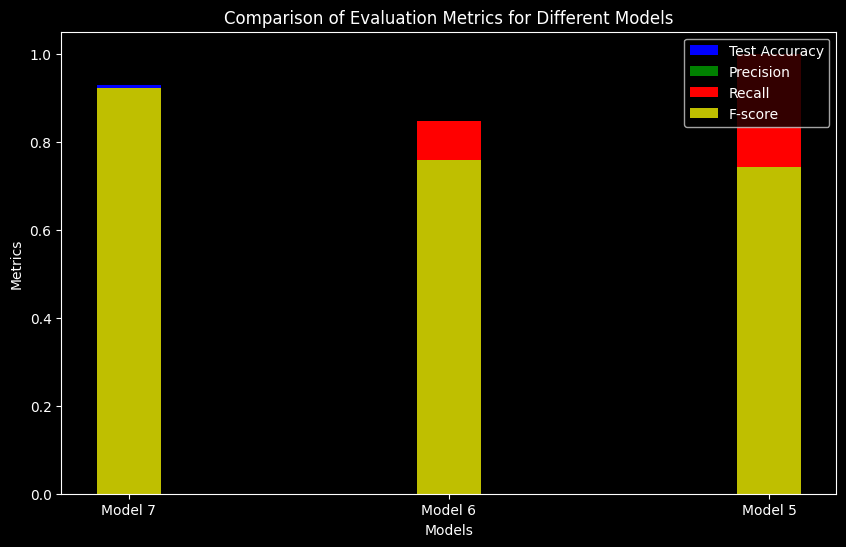

In [61]:
import matplotlib.pyplot as plt

# Define model configurations and evaluation metrics
models = ['Model 7', 'Model 6', 'Model 5']
test_accuracy = [0.9286, 0.75, 0.6786]
precision = [0.9231, 0.6875, 0.5909]
recall = [0.9231, 0.8462, 1.0]
f_score = [0.9231, 0.7586, 0.7429]

# Plotting the evaluation metrics
plt.figure(figsize=(10, 6))

plt.bar(models, test_accuracy, color='b', width=0.2, label='Test Accuracy')
plt.bar(models, precision, color='g', width=0.2, label='Precision')
plt.bar(models, recall, color='r', width=0.2, label='Recall')
plt.bar(models, f_score, color='y', width=0.2, label='F-score')

plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('Comparison of Evaluation Metrics for Different Models')
plt.legend()
plt.show()


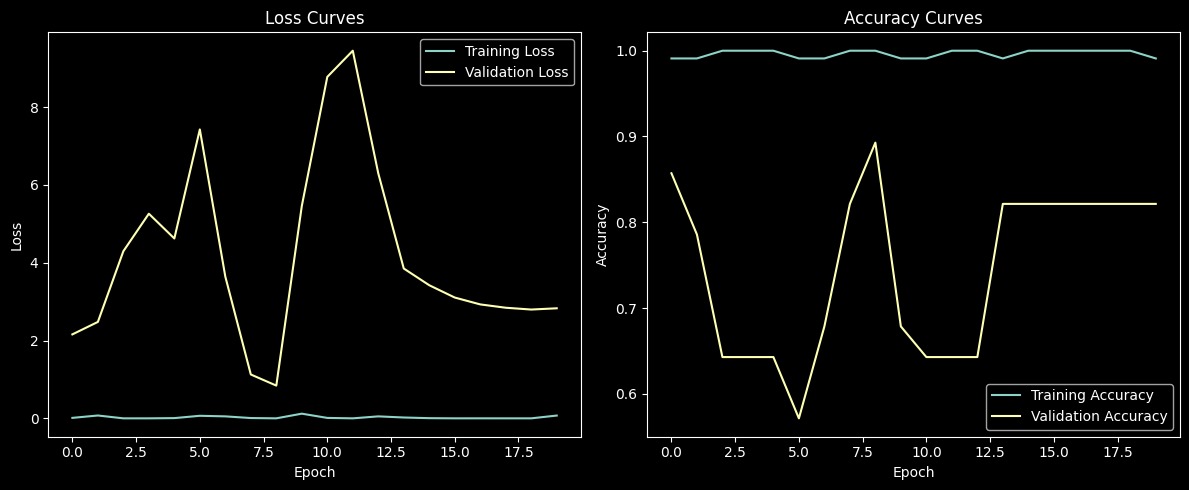

In [60]:
import matplotlib.pyplot as plt

# Extracting metrics from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotting loss curves
plt.figure(figsize=(12, 5))

# Loss curves
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy curves
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [ ]:
d tree

In [ ]:
import os
import numpy as np
from skimage.io import imread  # Assuming you're using scikit-image for image loading
from skimage.transform import resize  # For resizing images
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Step 1: Load the data
data_dir = "C:/Users/sarab/Desktop/DS_EXAMENARBETE/Brain_tumor"

# List all image file paths and corresponding labels
image_paths = []
labels = []

for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith(".jpg") or file.endswith(".png"):  # Assuming images are in JPG or PNG format
            image_paths.append(os.path.join(root, file))
            # Assuming labels are encoded in the directory structure
            labels.append(1 if "tumor" in root else 0)

# Load images and resize them to a target shape
target_shape = (128, 128)  # Adjust as needed
images = [resize(imread(image_path), target_shape) for image_path in image_paths]

# Step 3: Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Step 4: Train the Decision Tree Classifier
# Initialize the classifier
classifier = DecisionTreeClassifier()

# Flatten and reshape the image data for input to the classifier
x_train_flat = np.array([image.flatten() for image in x_train])
x_test_flat = np.array([image.flatten() for image in x_test])

# Train the classifier
classifier.fit(x_train_flat, y_train)

# Step 5: Evaluate the Classifier
# Make predictions on the test set
predictions = classifier.predict(x_test_flat)

# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Images Visualsing

In [ ]:
import glob
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = []
result = []
tumor = []
healthy = []
paths = []
for f in glob.iglob("C:/Users/sarab/Desktop/DS_EXAMENARBETE/Brain_tumor/yes/*.jpg"):
    img = cv2.imread(f)
    img = cv2.resize(img, (128, 128))
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    tumor.append(img)

for f in glob.iglob("C:/Users/sarab/Desktop/DS_EXAMENARBETE/Brain_tumor/no/*.jpg"):
    img = cv2.imread(f)
    img = cv2.resize(img, (128, 128))
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    healthy.append(img)
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
        
    
for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
        
        

In [ ]:
healthy = np.array(data)
tumor = np.array(data)
All = np.concatenate((healthy, tumor))

In [ ]:
def plot_random(healthy, tumor, num=5):
    healthy_imgs = healthy[np.random.choice(healthy.shape[0], num, replace=False)]
    tumor_imgs = tumor[np.random.choice(tumor.shape[0], num, replace=False)]
    
    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('healthy')
        plt.imshow(healthy_imgs[i])
        
    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('tumor')
        plt.imshow(tumor_imgs[i])
        

In [ ]:
plot_random(healthy, tumor, num=4)


In [ ]:
import numpy as np
from PIL import Image
from keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained model
model = load_model("4rgba_model.h5")

# Function to preprocess images
def preprocess_image(image_path, target_shape=(128, 128, 3)):
    image = Image.open(image_path)
    image = image.resize((target_shape[0], target_shape[1]))
    image = np.array(image)
    image = image / 255.0  # Normalize pixel values to range [0, 1]
    return image

# Function to make predictions on dataset images
def make_predictions(model, image_paths):
    predictions = []
    for image_path in image_paths:
        # Preprocess the image
        preprocessed_image = preprocess_image(image_path)
        # Add batch dimension (model expects input shape with batch dimension)
        preprocessed_image = np.expand_dims(preprocessed_image, axis=0)
        # Make prediction
        prediction = model.predict(preprocessed_image)
        predictions.append(prediction)
    return predictions

# List of paths to dataset images
image_paths = [
    "C:/Users/sarab/Desktop/DS_EXAMENARBETE/Brain_tumor/yes/Y1.jpg",

    "C:/Users/sarab/Desktop/DS_EXAMENARBETE/Brain_tumor/yes/Y2.jpg"
    # Add more image paths here
]

# True labels corresponding to the images (you need to replace this with your actual ground truth labels)
true_labels = [1, 1]  # Assuming 1 for tumor and 0 for healthy, update accordingly

# Make predictions
predictions = make_predictions(model, image_paths)

# Display the predictions
for image_path, prediction, true_label in zip(image_paths, predictions, true_labels):
    predicted_label = np.argmax(prediction)
    plt.imshow(Image.open(image_path))
    plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
    plt.show()


In [ ]:
import os

# Paths to the "yes" and "no" folders
yes_folder = "C:/Users/sarab/Desktop/DS_EXAMENARBETE/Brain_tumor/yes"
no_folder = "C:/Users/sarab/Desktop/DS_EXAMENARBETE/Brain_tumor/no"

# Function to count true positives, true negatives, false positives, and false negatives
def count_predictions(folder, true_label):
    true_positives = 0
    true_negatives = 0
    false_positives = 0
    false_negatives = 0
    
    for file_name in os.listdir(folder):
        image_path = os.path.join(folder, file_name)
        prediction = make_predictions(model, [image_path])[0]
        predicted_label = np.argmax(prediction)
        
        if predicted_label == true_label:
            if true_label == 1:
                true_positives += 1
            else:
                true_negatives += 1
        else:
            if true_label == 1:
                false_negatives += 1
            else:
                false_positives += 1
    
    return true_positives, true_negatives, false_positives, false_negatives

# Count predictions for "yes" folder
tp_yes, tn_yes, fp_yes, fn_yes = count_predictions(yes_folder, true_label=1)

# Count predictions for "no" folder
tp_no, tn_no, fp_no, fn_no = count_predictions(no_folder, true_label=0)

# Total counts
total_tp = tp_yes + tp_no
total_tn = tn_yes + tn_no
total_fp = fp_yes + fp_no
total_fn = fn_yes + fn_no

# Display counts
print("True Positives (Yes):", tp_yes)
print("True Negatives (No):", tn_no)
print("False Positives (No predicted as Yes):", fp_no)
print("False Negatives (Yes predicted as No):", fn_yes)

print("\nTotal True Positives:", total_tp)
print("Total True Negatives:", total_tn)
print("Total False Positives:", total_fp)
print("Total False Negatives:", total_fn)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(x_test, Y_pred))


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get model predictions on the test set
y_pred_probabilities = model.predict(x_test)

# Experiment with different probability thresholds
threshold = 0.5  # Adjust this threshold as needed
y_pred_binary = (y_pred_probabilities[:, 1] > threshold).astype(int)

# Convert one-hot encoded labels to binary labels for y_test
y_test_binary = np.argmax(y_test, axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Tumor', 'Healthy'], yticklabels=['Tumor', 'Healthy'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report with precision, recall, and F1-score
print(classification_report(y_test_binary, y_pred_binary, target_names=['Tumor', 'Healthy']))


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Train the model
#history = model.fit(x_train, y_train, epochs=30, batch_size=64, verbose=1, validation_data=(x_test, y_test))

# Get training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get model predictions on training and validation sets
y_train_pred = model.predict(x_train)
y_val_pred = model.predict(x_test)

# Calculate RMSE for training and validation sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse = np.sqrt(mean_squared_error(y_test, y_val_pred))

# Print the results
print(f'Training Loss: {train_loss[-1]:.4f}')
print(f'Validation Loss: {val_loss[-1]:.4f}')
print(f'Training RMSE: {train_rmse:.4f}')
print(f'Validation RMSE: {val_rmse:.4f}')


In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss over epochs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot actual vs. predicted values for the validation set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_val_pred, color='blue', label='Actual vs. Predicted')
plt.title('Actual vs. Predicted Values (Validation Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get model predictions on the test set
y_pred_probabilities = model.predict(x_test)

# Experiment with different probability thresholds
threshold = 0.5  # Adjust this threshold as needed
y_pred_binary = (y_pred_probabilities[:, 1] > threshold).astype(int)

# Convert one-hot encoded labels to binary labels for y_test
y_test_binary = np.argmax(y_test, axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Tumor', 'Healthy'], yticklabels=['Tumor', 'Healthy'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report with precision, recall, and F1-score
print(classification_report(y_test_binary, y_pred_binary, target_names=['Tumor', 'Healthy']))


In [ ]:
# Calculate False Positives (FP) and True Negatives (TN)
from sklearn.metrics import confusion_matrix, classification_report

FP = conf_matrix[0, 1]
TN = conf_matrix[1, 0]

# Create a table
table_data = {'': ['False Positives (FP)', 'True Negatives (TN)'],
              'Count': [FP, TN]}

table_df = pd.DataFrame(table_data)
print(table_df)


In [ ]:
model.save('tumor_best_model.h5')


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('tumor_beset_model.h5')

# Now you can use this model for predictions or further training


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split

# Load the model
model = load_model('tumor_beset_model.h5')

# Assuming you have a dataset named 'data' and its corresponding labels named 'result'
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=42)

# Make predictions on the test dataset
predictions = model.predict(x_test)

# Convert the predictions to binary values (0 or 1)
binary_predictions = np.round(predictions)

# Convert the true labels to binary values if necessary
binary_true_labels = np.round(y_test)

# Calculate the counts of 'yes' and 'no'
count_yes = np.sum((binary_predictions == 1) & (binary_true_labels == 1))
count_no = np.sum((binary_predictions == 0) & (binary_true_labels == 0))

print("Count of 'yes' instances:", count_yes)
print("Count of 'no' instances:", count_no)


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split

# Load the model
model = load_model('4rgba_model.h5')

# Assuming you have a dataset named 'data' and its corresponding labels named 'result'
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=42)

# Make predictions on the test dataset
predictions = model.predict(x_test)

# Convert the predictions to binary values (0 or 1)
binary_predictions = np.round(predictions)

# Convert the true labels to binary values if necessary
binary_true_labels = np.round(y_test)

# Count the instances where the predicted label matches the true label
correct_predictions = np.sum(binary_predictions == binary_true_labels)

print("Count of correct predictions:", correct_predictions)


In [ ]:
count_correct_yes = np.sum((binary_predictions == 1) & (binary_true_labels == 1))
count_correct_no = np.sum((binary_predictions == 0) & (binary_true_labels == 0))

print("Count of correct 'yes' instances:", count_correct_yes)
print("Count of correct 'no' instances:", count_correct_no)


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split

# Load the model
model = load_model('4rgba_model.h5')

# Assuming you have a dataset named 'data' and its corresponding labels named 'result'
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=42)

# Make predictions on the test dataset
predictions = model.predict(x_test)

# Convert the predictions to binary values (0 or 1)
binary_predictions = np.round(predictions)

# Convert the true labels to binary values if necessary
binary_true_labels = np.round(y_test)

# Convert binary predictions and true labels to 'yes' and 'no'
labels_predictions = np.where(binary_predictions == 1, 'yes', 'no')
labels_true = np.where(binary_true_labels == 1, 'yes', 'no')

# Concatenate predicted labels, true labels, and original true labels
labeled_array = np.column_stack((labels_predictions, labels_true, binary_true_labels))

print("Labeled Array (Predicted Label, True Label, Original True Label):")
print(labeled_array)


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split

# Load the model
model = load_model('y_n_model.h5')

# Assuming you have a dataset named 'data' and its corresponding labels named 'result'
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=42)

# Make predictions on the test dataset
predictions = model.predict(x_test)

# Convert the predictions to binary values (0 or 1)
binary_predictions = np.round(predictions)

# Convert the true labels to binary values if necessary
binary_true_labels = np.round(y_test)

# Convert binary predictions and true labels to 'yes' and 'no'
labels_predictions = np.where(binary_predictions == 1, 'yes', 'no')
labels_true = np.where(binary_true_labels == 1, 'yes', 'no')

# Concatenate predicted labels, true labels, and original true labels
labeled_array = np.column_stack((labels_predictions, labels_true, binary_true_labels))

# Count occurrences where predicted label is 'yes' and original label is also 'yes'
count_yes_predicted_yes = np.sum((labels_predictions == 'yes') & (labels_true == 'yes'))

print("Count of instances where predicted label is 'yes' and original label is also 'yes':", count_yes_predicted_yes)


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split

# Load the model
model = load_model('4rgba_model.h5')

# Assuming you have a dataset named 'data' and its corresponding labels named 'result'
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=42)

# Make predictions on the test dataset
predictions = model.predict(x_test)

# Convert the predictions to binary values (0 or 1)
binary_predictions = np.round(predictions)

# Convert the true labels to binary values if necessary
binary_true_labels = np.round(y_test)

# Convert binary predictions and true labels to 'yes' and 'no'
labels_predictions = np.where(binary_predictions == 1, 'yes', 'no')
labels_true = np.where(binary_true_labels == 1, 'yes', 'no')

# Concatenate predicted labels, true labels, and original true labels
labeled_array = np.column_stack((labels_predictions, labels_true, binary_true_labels))

# Count occurrences of different label combinations
count_true_positive = np.sum((labels_predictions == 'yes') & (labels_true == 'yes'))
count_false_positive = np.sum((labels_predictions == 'yes') & (labels_true == 'no'))
count_true_negative = np.sum((labels_predictions == 'no') & (labels_true == 'no'))
count_false_negative = np.sum((labels_predictions == 'no') & (labels_true == 'yes'))

print("Count of true positive instances (predicted 'yes', true 'yes'):", count_true_positive)
print("Count of false positive instances (predicted 'yes', true 'no'):", count_false_positive)
print("Count of true negative instances (predicted 'no', true 'no'):", count_true_negative)
print("Count of false negative instances (predicted 'no', true 'yes'):", count_false_negative)


In [ ]:
import numpy as np

# Counts of true positive, false positive, true negative, and false negative instances
count_true_positive = 18
count_false_positive = 7
count_true_negative = 21
count_false_negative = 10

# Create the confusion matrix table
confusion_matrix_table = np.array([[count_true_positive, count_false_positive],
                                   [count_false_negative, count_true_negative]])

print("Confusion Matrix Table:")
print(confusion_matrix_table)


In [ ]:


# Counts of true positive, false positive, true negative, and false negative instances
count_true_positive = 18
count_false_positive = 7
count_true_negative = 21
count_false_negative = 10

# Calculate metrics
accuracy = (count_true_positive + count_true_negative) / (count_true_positive + count_false_positive + count_true_negative + count_false_negative)
precision = count_true_positive / (count_true_positive + count_false_positive)
recall = count_true_positive / (count_true_positive + count_false_negative)
specificity = count_true_negative / (count_true_negative + count_false_positive)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)


In [ ]:
#RESNET Model 

In [62]:

from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="SAME", use_bias=False)

class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(filters, strides=strides),
            keras.layers.BatchNormalization(),
            self.activation,
            DefaultConv2D(filters),
            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                keras.layers.BatchNormalization()]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [63]:
model = keras.models.Sequential()
model.add(DefaultConv2D(64, kernel_size=7, strides=2,
                        input_shape=[128, 128, 3]))  # Adjusted input shape to [128, 128, 3]
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
prev_filters = 64
 
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters

model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
#model.add(keras.layers.Dense(10, activation="softmax"))


In [64]:
model.add(Dense(2, activation='sigmoid'))

# Compile the model with accuracy as a metric
optimizer = keras.optimizers.Adam(learning_rate=0.001)  # You can adjust the learning rate value
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 64, 64, 64)        9408      
                                                                 
 batch_normalization_8 (Bat  (None, 64, 64, 64)        256       
 chNormalization)                                                
                                                                 
 activation (Activation)     (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 residual_unit (ResidualUni  (None, 32, 32, 64)        74240     
 t)                                                              
                                                      

In [65]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 32, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
4/4 [==============================] - 27s 2s/step - loss: 1.8036 - accuracy: 0.5315 - val_loss: 12.0404 - val_accuracy: 0.5357
Epoch 2/30
4/4 [==============================] - 5s 1s/step - loss: 0.6670 - accuracy: 0.6847 - val_loss: 101.6604 - val_accuracy: 0.5357
Epoch 3/30
4/4 [==============================] - 5s 1s/step - loss: 0.4502 - accuracy: 0.8288 - val_loss: 354.0809 - val_accuracy: 0.5357
Epoch 4/30
4/4 [==============================] - 5s 1s/step - loss: 0.1570 - accuracy: 0.9369 - val_loss: 734.7120 - val_accuracy: 0.5357
Epoch 5/30
4/4 [==============================] - 5s 1s/step - loss: 0.0825 - accuracy: 0.9550 - val_loss: 1035.7349 - val_accuracy: 0.5357
Epoch 6/30
4/4 [==============================] - 5s 1s/step - loss: 0.2021 - accuracy: 0.9459 - val_loss: 1009.0917 - val_accuracy: 0.5357
Epoch 7/30
4/4 [==============================] - 5s 1s/step - loss: 0.3544 - accuracy: 0.9009 - val_loss: 1194.0537 - val_accuracy: 0.5357
Epoch 8/30
4/4 [========

In [66]:
# Calculate False Positives (FP) and True Negatives (TN)
FP = conf_matrix[0, 1]
TN = conf_matrix[1, 0]

# Create a table
table_data = {'': ['False Positives (FP)', 'True Negatives (TN)'],
              'Count': [FP, TN]}

table_df = pd.DataFrame(table_data)
print(table_df)



                         Count
0  False Positives (FP)      5
1   True Negatives (TN)      1


NameError: name 'y_val_pred' is not defined

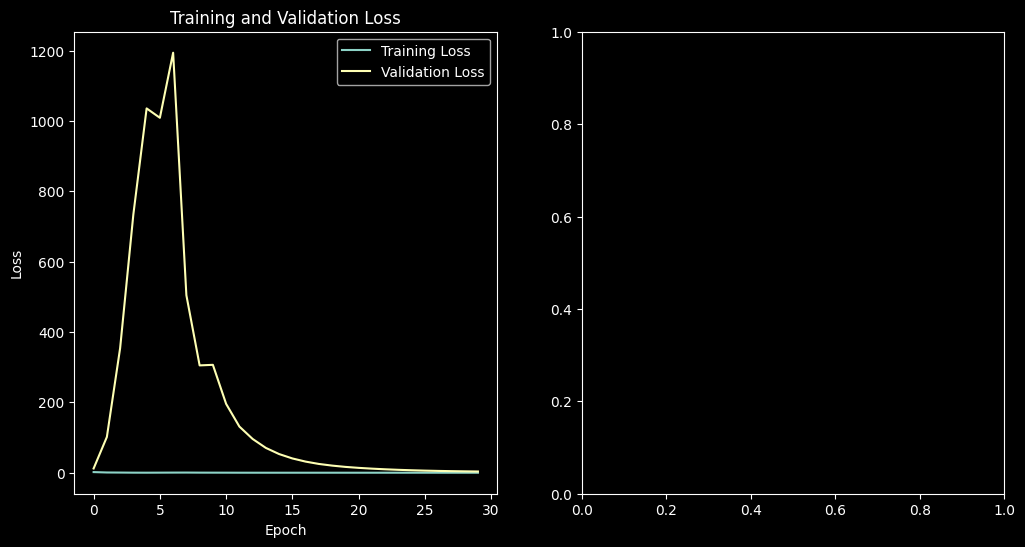

In [67]:
import matplotlib.pyplot as plt

# Plot training and validation loss over epochs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot actual vs. predicted values for the validation set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_val_pred, color='blue', label='Actual vs. Predicted')
plt.title('Actual vs. Predicted Values (Validation Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from keras.layers import Dropout

model = keras.models.Sequential()
model.add(DefaultConv2D(64, kernel_size=7, strides=2, input_shape=[128, 128, 3]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
prev_filters = 64

for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    model.add(Dropout(0.2))  # Adjust the dropout rate as needed
    prev_filters = filters

model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))  # Adjust the dropout rate as needed
model.add(Dense(2, activation='sigmoid'))

# Compile the model with accuracy as a metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())

In [ ]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 32, verbose = 1,validation_data = (x_test, y_test))

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss over epochs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot actual vs. predicted values for the validation set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_val_pred, color='blue', label='Actual vs. Predicted')
plt.title('Actual vs. Predicted Values (Validation Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Fit the model and store the history
history = model.fit(x_train, y_train, epochs=30, batch_size=32, verbose=1, validation_data=(x_test, y_test))

# Extract loss and validation loss from history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss and validation loss
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [ ]:

# Define your model
model = Sequential()
model.add(DefaultConv2D(64, kernel_size=7, strides=2, input_shape=[128, 128, 3]))
model.add(BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(MaxPooling2D(pool_size=3, strides=2, padding="SAME"))
prev_filters = 64

for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    model.add(Dropout(0.2))  # Adjust the dropout rate as needed
    prev_filters = filters

model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Adjust the dropout rate as needed
model.add(Dense(2, activation='sigmoid'))  # Adjust based on the number of classes

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])




In [ ]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 32, verbose = 1,validation_data = (x_test, y_test))

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model architecture
def create_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Load and preprocess the training and validation data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# Create the model
input_shape = train_images.shape[1:]
num_classes = train_labels.shape[1]
model = create_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


In [ ]:

from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import os

# Define paths to the dataset
dataset_dir = "C:/Users/sarab/Desktop/DS_EXAMENARBETE/Brain_tumor/"

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images by up to 10 degrees
    width_shift_range=0.1,  # randomly shift images horizontally by up to 10% of the width
    height_shift_range=0.1,  # randomly shift images vertically by up to 10% of the height
    shear_range=0.1,  # apply random shear transformation
    zoom_range=0.1,  # apply random zoom
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=True,  # randomly flip images vertically
    fill_mode='nearest'  # strategy used for filling in newly created pixels
)

# Directory to save augmented images
save_dir = "C:/Users/sarab/Desktop/DS_EXAMENARBETE/Brain_tumor/augmented_images"

# Ensure the save directory exists
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Augment images in the minority class (tumor)
tumor_dir = os.path.join(dataset_dir, "yes")
for filename in os.listdir(tumor_dir):
    img_path = os.path.join(tumor_dir, filename)
    img = load_img(img_path)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1, save_to_dir=save_dir, save_prefix='tumor', save_format='jpg'):
        i += 1
        if i >= 10:  # generate 10 augmented images per original image
            break

# After augmentation, check the balance of the dataset again
augmented_tumor_count = len(os.listdir(save_dir))
print("Number of augmented tumor images:", augmented_tumor_count)

# Now, the dataset is balanced as both classes have approximately equal representation


In [ ]:
# Define an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Create data generators for training and testing data
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Train the model using fit_generator
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)


In [ ]:
Model after agumetion 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import os

# Define paths to the augmented dataset
dataset_dir = "C:/Users/sarab/Desktop/DS_EXAMENARBETE/Brain_tumor/"
augmented_images_dir = "C:/Users/sarab/Desktop/DS_EXAMENARBETE/Brain_tumor/augmented_images"

# Load images and labels
tumor_images = [os.path.join(augmented_images_dir, img) for img in os.listdir(augmented_images_dir)]
non_tumor_images = [os.path.join(dataset_dir, "no", img) for img in os.listdir(os.path.join(dataset_dir, "no"))]

# Combine tumor and non-tumor images
all_images = tumor_images + non_tumor_images
# Labels: 1 for tumor, 0 for non-tumor
labels = [1] * len(tumor_images) + [0] * len(non_tumor_images)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_images, labels, test_size=0.2, random_state=42)

# Define image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

# Function to preprocess images
def preprocess_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_width, img_height))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = tf.keras.applications.mobilenet_v2.preprocess_input(img)
    return img

# Preprocess training and testing images
X_train = np.array([preprocess_image(img) for img in X_train])
X_test = np.array([preprocess_image(img) for img in X_test])

# Create CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=batch_size, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load images and labels
data_dir = "C:/Users/sarab/Desktop/DS_EXAMENARBETE/Brain_tumor/"
tumor_dir = os.path.join(data_dir, "yes")
non_tumor_dir = os.path.join(data_dir, "no")

tumor_images = [os.path.join(tumor_dir, img) for img in os.listdir(tumor_dir)]
non_tumor_images = [os.path.join(non_tumor_dir, img) for img in os.listdir(non_tumor_dir)]

all_images = tumor_images + non_tumor_images
labels = [1] * len(tumor_images) + [0] * len(non_tumor_images)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_images, labels, test_size=0.2, random_state=42)

# Define image dimensions
img_width, img_height = 128, 128
num_channels = 3  # RGB

# Function to preprocess images
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((img_width, img_height))
    img = np.array(img) / 255.0  # Normalize pixel values
    return img

# Preprocess training and testing images
X_train = np.array([preprocess_image(img) for img in X_train])
X_test = np.array([preprocess_image(img) for img in X_test])

# Convert labels to NumPy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Create CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, num_channels)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np

# Define paths to the augmented dataset
tumor_dir = "C:/Users/sarab/Desktop/DS_EXAMENARBETE/Brain_tumor/augmented_images"
non_tumor_dir = "C:/Users/sarab/Desktop/DS_EXAMENARBETE/Brain_tumor/no"

# Load images and labels
tumor_images = [os.path.join(tumor_dir, img) for img in os.listdir(tumor_dir)]
non_tumor_images = [os.path.join(non_tumor_dir, img) for img in os.listdir(non_tumor_dir)]

# Combine tumor and non-tumor images
all_images = tumor_images + non_tumor_images
# Labels: 1 for tumor, 0 for non-tumor
labels = [1] * len(tumor_images) + [0] * len(non_tumor_images)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_images, labels, test_size=0.2, random_state=42)

# Define image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

# Function to preprocess images
def preprocess_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_width, img_height))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = tf.keras.applications.mobilenet_v2.preprocess_input(img)
    return img

# Preprocess training and testing images
X_train = np.array([preprocess_image(img) for img in X_train])
X_test = np.array([preprocess_image(img) for img in X_test])

# Create CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=batch_size, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
